In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mcsm_benchs.Benchmark import Benchmark
from mcsm_benchs.SignalBank import SignalBank
from src.utilities.spatstats_utils import compute_rank_envelope_test, generate_white_noise_zeros_pp
from src.utilities.utils import one_sided_spectrogram_and_zeros



plt.rcParams['xtick.labelsize'] = 6.0
plt.rcParams['ytick.labelsize'] = 6.0
plt.rcParams['axes.labelsize'] =  7.0

In [2]:
# rng
np.random.seed(1) 

# signal parameters
SNRin = 10
N = 2**8
Nsub=None
sbank = SignalBank(N=N,)
# s = sbank.signal_linear_chirp()
s = sbank.signal_mc_double_cos_chirp()

noise = np.random.randn(N,)
signal, scaled_noise = Benchmark.sigmerge(s,noise,SNRin, return_noise=True)

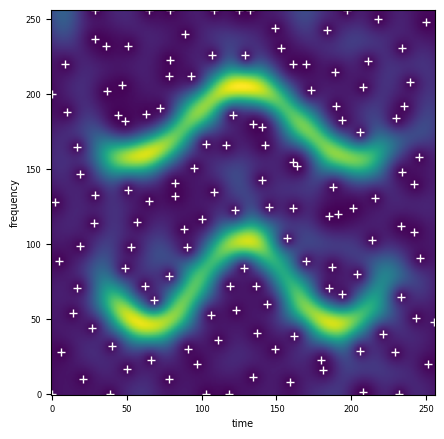

In [3]:
Nfft = 2*N
S, ceros, stft = one_sided_spectrogram_and_zeros(signal)
fig, ax = plt.subplots(1,1,figsize = (5,5))
ax.imshow(abs(stft[0:Nfft//2+1]), origin='lower')#, cmap=cmocean.cm.deep)
ax.plot(ceros[:,1],ceros[:,0],'w+')
ax.set_xlabel('time'); ax.set_ylabel('frequency')
plt.show()

In [4]:
# Generate nsim realizations of white noise and compute the pp's
nsim=2499
list_ppp = generate_white_noise_zeros_pp(N,nsim=nsim,Nfft=Nfft)

In [5]:
output_dic_1 = compute_rank_envelope_test(signal,
                                        Nfft=Nfft,
                                        fun='Fest', 
                                        correction='rs', 
                                        return_dic=True,
                                        nsim=nsim,
                                        # ppp_sim=list_ppp,
                                        rmin=0,
                                        rmax=1.2,
                                        alternative='two.sided' # To compute both envelopes.
                                        )

A curve_set(1d) object with 2500 curves observed at 60 argument values
(1 observed, 2499 simulated).
Contains: 
$ r     :  num [1:60] 0 0.02 0.0401 0.0601 0.0801 ...
$ funcs :  num [1:60, 1:2500] 0 0.000793 0.005127 0.010704 0.018204 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:60] "1" "2" "3" "4" ...
  ..$ : chr [1:2500] "obs" "sim1" "sim2" "sim3" ...



True 0.7008919754925251


/tmp/ipykernel_47254/748279823.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),)
/tmp/ipykernel_47254/748279823.py:109: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),)


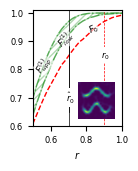

In [16]:
print(output_dic_1['rejectH0'],output_dic_1['r_max_dif'])

fig, ax = plt.subplots(1,1,figsize=(1.15,1.5))
ax.fill_between(output_dic_1['radi'], output_dic_1['envelope_lo'], output_dic_1['envelope_hi'], facecolor='w', edgecolor='g', alpha=.3, hatch='/////')
ax.plot(output_dic_1['radi'],output_dic_1['envelope_obs'],'r--', linewidth=1.0)
if output_dic_1['rejectH0']:
    ax.plot([output_dic_1['r_max_dif'],output_dic_1['r_max_dif']],[0.65,output_dic_1['envelope_lo'][output_dic_1['ind_max_dif']]],'k', 
        linewidth=0.5)

axins = inset_axes(ax, width=0.37, height=0.37, loc=4)
axins.imshow(S, origin='lower')
# axins.imshow(abs(stft[0:N+1]), origin='lower')
axins.axis('off')
fig.canvas.draw()
axins.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

label_size = 6.0

# Indicate the estimation of r_0
if output_dic_1['rejectH0']:
    ax.plot([output_dic_1['r_max_dif'],output_dic_1['r_max_dif']],
        # [0.5,output_dic['envelope_lo'][output_dic['ind_max_dif']]/np.pi*2],
        [0.5,1.01],
        'k', 
        linewidth=0.5,)

# Near optimal r_0:
ax.plot([0.9,0.9],
[0.5,1.01],
'r--', 
linewidth=0.5)

ax.text(0.9*1.01,
        0.85,
        r'$r_{0}$',
        fontsize=6.0,  
        horizontalalignment='center',
        verticalalignment='center',
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':1.5})  

# r_0 estimation
ax.text(output_dic_1['r_max_dif']*1.01,
        0.7,
        r'$\hat{r}_{0}$',
        fontsize=6.0,  
        horizontalalignment='center',
        verticalalignment='center',
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':1.5},
        )

# Label the curves:
# Upper envelope:
ax.plot(output_dic_1['radi'],output_dic_1['envelope_hi'], 'g-.', alpha=.5, linewidth=1.0)
xind = np.where(output_dic_1['radi']>=0.55)[0][0]
xcoord = output_dic_1['radi'][xind]
angle = 180/np.pi*np.arctan((output_dic_1['envelope_hi'][xind+1]-output_dic_1['envelope_hi'][xind])/
                 (output_dic_1['radi'][xind+1]-output_dic_1['radi'][xind]))
t = ax.text(xcoord,output_dic_1['envelope_hi'][xind]*1.0,
        r'$F^{(1)}_{upp}$', 
        fontsize=label_size,
        rotation=angle,
        horizontalalignment='center', 
        verticalalignment='center',
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':0.01},
        )
t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='none', pad=0.01))

# Lower envelope:
ax.plot(output_dic_1['radi'],output_dic_1['envelope_lo'], 'g-.', alpha=.5, linewidth=1.0)
xind = np.where(output_dic_1['radi']>=0.68)[0][0]
xcoord = output_dic_1['radi'][xind]
angle = 180/np.pi*np.arctan((output_dic_1['envelope_lo'][xind+3]-output_dic_1['envelope_lo'][xind-4])/
                 (output_dic_1['radi'][xind+3]-output_dic_1['radi'][xind-4]))
t = ax.text(xcoord,output_dic_1['envelope_lo'][xind],
        r'$F^{(1)}_{low}$', 
        rotation=angle,
        fontsize=label_size, 
        horizontalalignment='center',
        verticalalignment='center',        
        backgroundcolor = 'w',
        # bbox={'facecolor':'white', 'edgecolor':'none','pad':0.01},
        )
t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='none', pad=0.01))

# Observation:
xind = np.where(output_dic_1['radi']>=0.84)[0][0]
xcoord = output_dic_1['radi'][xind]
angle = 180/np.pi*np.arctan((output_dic_1['envelope_obs'][xind+2]-output_dic_1['envelope_obs'][xind])/
                 (output_dic_1['radi'][xind+2]-output_dic_1['radi'][xind]))
t = ax.text(xcoord,output_dic_1['envelope_obs'][xind],
        r'$F_{0}$', 
        rotation=angle,
        fontsize=label_size,
        horizontalalignment='center',
        verticalalignment='center',
        backgroundcolor = 'w',
        # bbox={'facecolor':'white', 'edgecolor':'none','pad':0.6},
        )
t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='none', pad=0.01))



ax.set_xlim([0.5, 1.0])
ax.set_ylim([0.6, 1.01])
ax.set_xticklabels(ax.get_xticklabels(),)
ax.set_yticklabels(ax.get_yticklabels(),)
ax.set(xlabel=r'$r$')

fig.savefig('figures/adaptive_thr_scale_F.pdf', 
            dpi=900, 
            transparent=False, 
            bbox_inches='tight',
                pad_inches = 0,
        )

In [7]:
nsim=2499
# signal, noise = add_snr(s,SNRin)
output_dic = compute_rank_envelope_test(signal,
                                        fun='Fest', 
                                        correction='rs',
                                        return_dic=True,
                                        nsim=nsim,
                                        ppp_sim=list_ppp,
                                        rmin=0.0,
                                        rmax=1.2,
                                        transform='asin(sqrt(.))',
                                        alternative='two.sided'
                                        )                                   

A curve_set(1d) object with 2500 curves observed at 60 argument values
(1 observed, 2499 simulated).
Contains: 
$ r     :  num [1:60] 0 0.0201 0.0402 0.0603 0.0804 ...
$ funcs :  num [1:60, 1:2500] 0 0.0383 0.0721 0.1032 0.1365 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:60] "1" "2" "3" "4" ...
  ..$ : chr [1:2500] "obs" "sim1" "sim2" "sim3" ...



True 0.7843602686330758


/tmp/ipykernel_41743/1212650394.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=label_size)
/tmp/ipykernel_41743/1212650394.py:129: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=label_size)


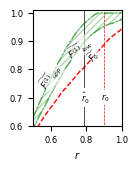

In [8]:
print(output_dic['rejectH0'],output_dic['r_max_dif'])

# New figure of envelopes.
fig, ax = plt.subplots(1,1,figsize=(1.15,1.5))

# Fill between upper and lower envelopes.
ax.fill_between(output_dic['radi'], 
                output_dic['envelope_lo']/np.pi*2, 
                output_dic['envelope_hi']/np.pi*2, 
                facecolor='w', 
                edgecolor='g', 
                alpha=.3, 
                hatch='/////')

# Observed functional statistic.
ax.plot(output_dic['radi'],
        output_dic['envelope_obs']/np.pi*2,
        'r--', 
        linewidth=1.0)

# Indicate the estimation of r_0
if output_dic['rejectH0']:
    ax.plot([output_dic['r_max_dif'],output_dic['r_max_dif']],
        # [0.5,output_dic['envelope_lo'][output_dic['ind_max_dif']]/np.pi*2],
        [0.5,1.01],
        'k', 
        linewidth=0.5)

# Near optimal r_0:
ax.plot([0.9,0.9],
[0.5,1.01],
'r--', 
linewidth=0.5)

ax.text(0.9*1.01,
        0.7,
        r'$r_{0}$', 
        fontsize=6.0, 
        horizontalalignment='center',
        verticalalignment='center',
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':1.5}) 

# axins = inset_axes(ax, width=0.55, height=0.55, loc=4)
# axins.imshow(S, origin='lower')
# # axins.imshow(abs(stft[0:N+1]), origin='lower')
# axins.axis('off')
# fig.canvas.draw()
# axins.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

label_size = 6.0

# Label estimated r_0
# ax.text(output_dic['r_max_dif']*1.01,1.0,r'$r_{0}$', horizontalalignment='left')
ax.text(output_dic['r_max_dif']*1.01,
        0.7,
        r'$\hat{r}_{0}$',
        fontsize=6.0,  
        horizontalalignment='center',
        verticalalignment='center',
        backgroundcolor = 'w',
        bbox={'facecolor':'white', 'edgecolor':'none','pad':1.5})


# Label the curves:
# Upper envelope:
ax.plot(output_dic['radi'],
        output_dic['envelope_hi']/np.pi*2, 
        'g-.', 
        alpha=.5, 
        linewidth=1.0)

xind = np.where(output_dic['radi']>=0.6)[0][0]
xcoord = output_dic['radi'][xind]
angle = 180/np.pi*np.arctan((output_dic['envelope_hi'][xind+10]-output_dic['envelope_hi'][xind])/
                 (output_dic['radi'][xind+10]-output_dic['radi'][xind]))

t = ax.text(xcoord,output_dic['envelope_hi'][xind]/np.pi*2,
        r'$\widetilde{F^{(1)}}_{upp}$', 
        fontsize=label_size,
        rotation=angle,
        horizontalalignment='center',
        verticalalignment='center',        
        backgroundcolor = 'w',
        # bbox={'facecolor':'white', 'edgecolor':'none','pad':0.01},
        )
t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='none', pad=0.01))

# Lower envelope:
ax.plot(output_dic['radi'],
        output_dic['envelope_lo']/np.pi*2, 
        'g-.', 
        alpha=.5, 
        linewidth=1.0)

xind = np.where(output_dic['radi']>=0.75)[0][0]
xcoord = output_dic['radi'][xind]
angle = 180/np.pi*np.arctan((output_dic['envelope_lo'][xind+10]-output_dic['envelope_lo'][xind])/(output_dic['radi'][xind+10]-output_dic['radi'][xind]))
t = ax.text(xcoord,output_dic['envelope_lo'][xind]/np.pi*2,
        r'$\widetilde{F^{(1)}}_{low}$', 
        rotation=angle,
        fontsize=label_size, 
        horizontalalignment='center',
        verticalalignment='center',        
        backgroundcolor = 'w',
        # bbox={'facecolor':'white', 'edgecolor':'none','pad':0.01},
        )
t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='none', pad=0.01))

# Observation:
xind = np.where(output_dic['radi']>=0.77)[0][0]
xcoord = output_dic['radi'][xind+3]
angle = 180/np.pi*np.arctan((output_dic['envelope_obs'][xind+3]-output_dic['envelope_obs'][xind])/
                 (output_dic['radi'][xind+3]-output_dic['radi'][xind]))
t = ax.text(xcoord,output_dic['envelope_obs'][xind+3]/np.pi*2,
        r'$\widetilde{F_{0}}$', 
        rotation=angle,
        fontsize=label_size,
        horizontalalignment='center',
        verticalalignment='center',        
        backgroundcolor = 'w',
        # bbox={'facecolor':'white', 'edgecolor':'none','pad':0.05},
        )
t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='none', pad=0.01))

ax.set_xlim([0.5, 1.0])
ax.set_ylim([0.6, 1.01])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=label_size)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=label_size)
ax.set(xlabel=r'$r$',ylabel='')


fig.savefig('figures/adaptive_thr_scale_Fvs.pdf', dpi=900, transparent=False, bbox_inches='tight',  pad_inches = 0)